In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [ ]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
##  Checking missing values]
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

We found that there is no null values in dataset

In [ ]:
#getting categorical and numerical variables
Cat_variables =[]
Num_variables = []
for features in df.columns:
    if df[features].dtype == 'O':
        Cat_variables.append(features)
    else:
        Num_variables.append(features)

print(Cat_variables, Num_variables)

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission'] ['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner']


In [ ]:
len(df['Car_Name'].unique())

98

There is 98 unique categories so we drop  car_name column

In [ ]:
## Droping feature car_name
df.drop('Car_Name', axis= 1 , inplace= True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


Transformning year to no_of_years

In [ ]:
df['No Of Year'] = 2021 - df['Year']


In [ ]:
# droping Yeqar column
df.drop('Year' , axis = 1 , inplace = True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No Of Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [ ]:
df = pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No Of Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


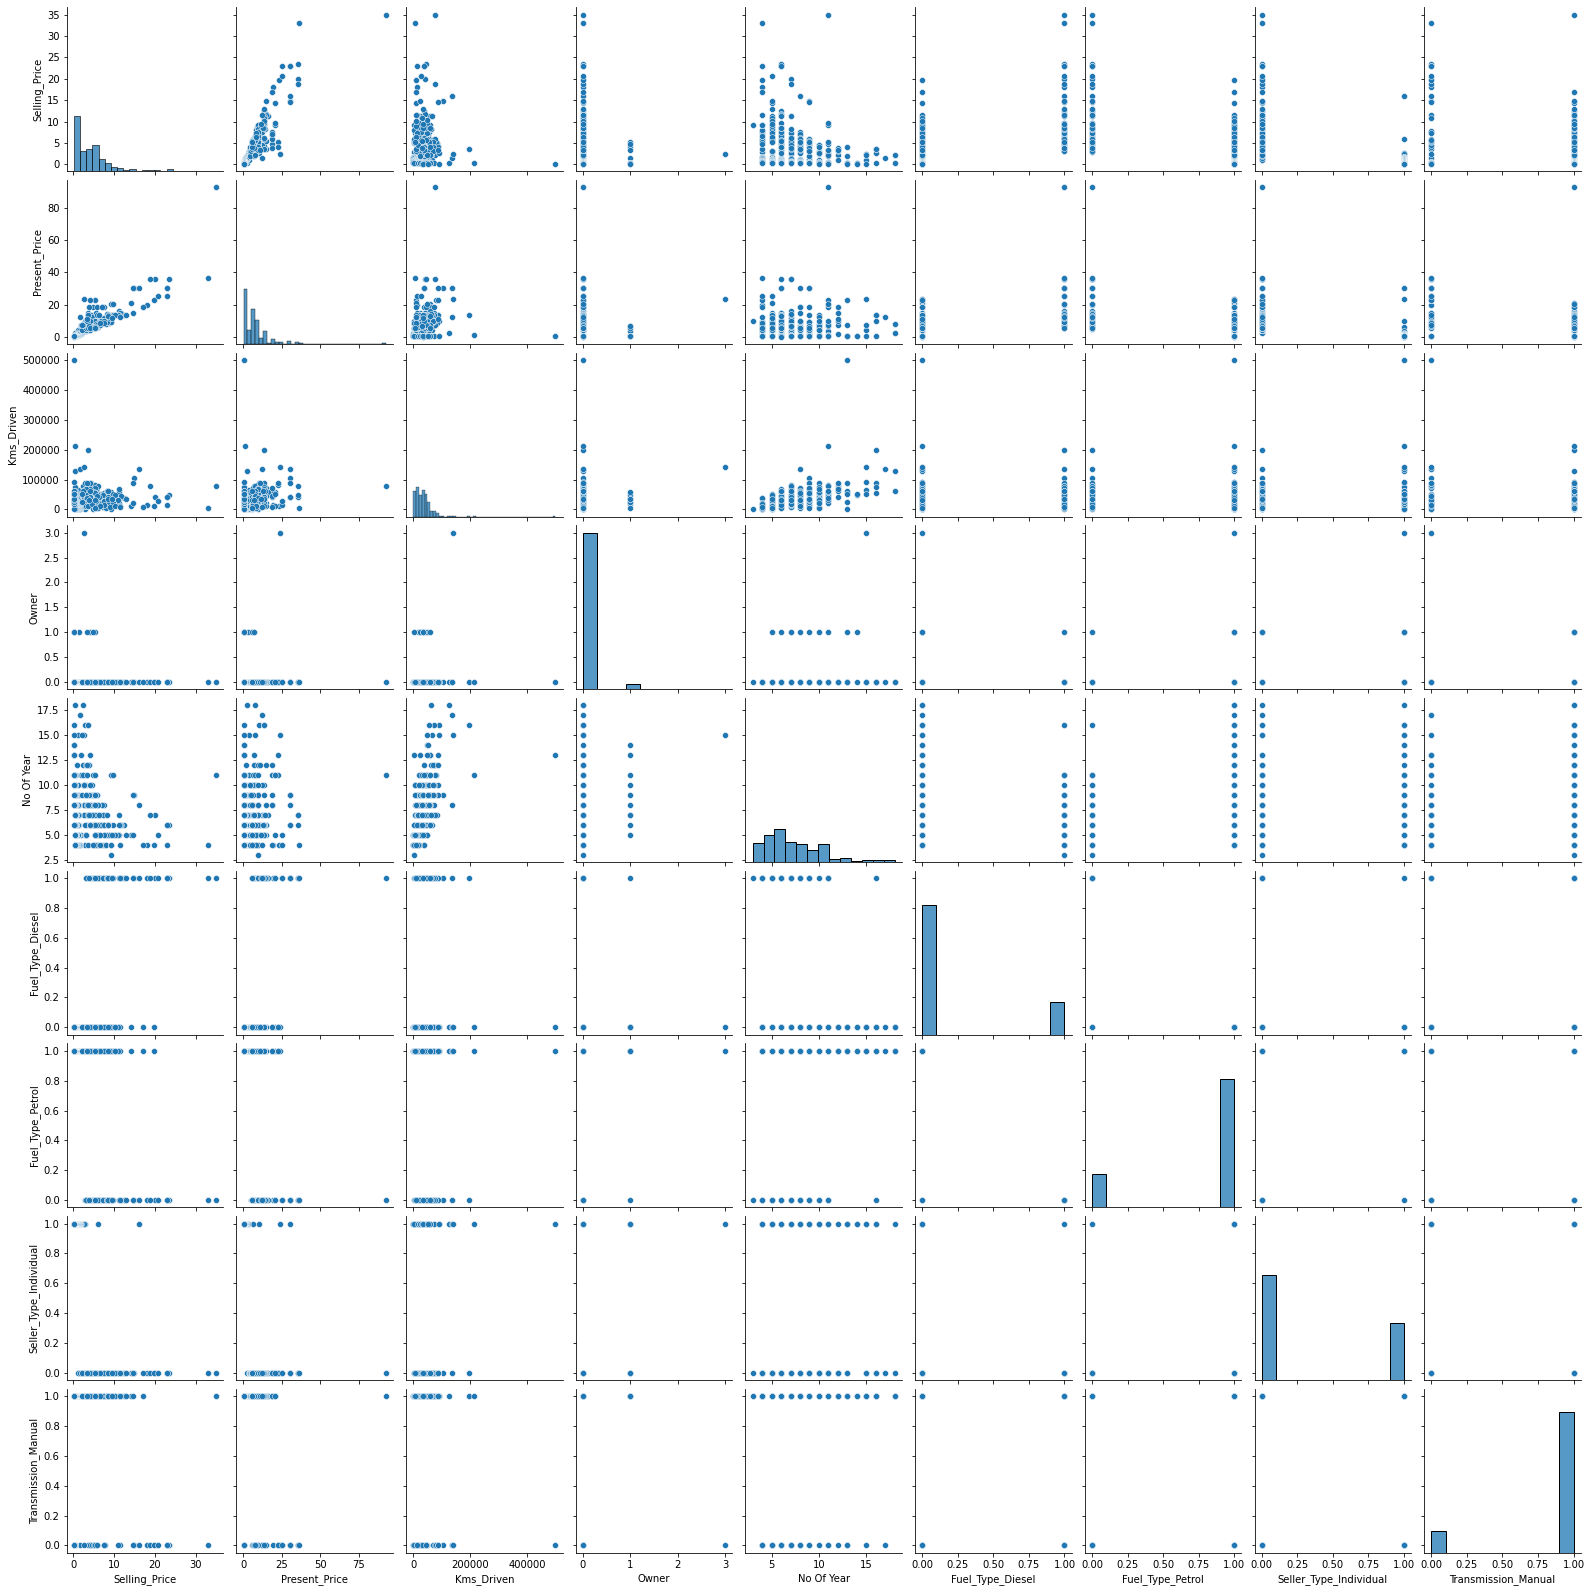

In [ ]:
sns.pairplot(df)

In [ ]:
cor = df.corr()
cor['Selling_Price'].sort_values(ascending =False)

Selling_Price             1.000000
Present_Price             0.878983
Fuel_Type_Diesel          0.552339
Kms_Driven                0.029187
Owner                    -0.088344
No Of Year               -0.236141
Transmission_Manual      -0.367128
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Name: Selling_Price, dtype: float64

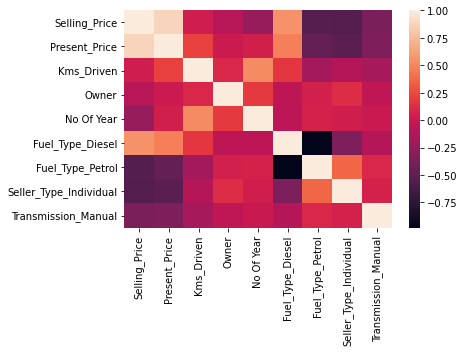

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# Features and labels
X = df.drop('Selling_Price' ,axis = 1)
Y = df['Selling_Price']

print("Features shape - " , X.shape)
print("Label shape - " , Y.shape)

Features shape -  (301, 8)
Label shape -  (301,)


In [ ]:
## Feture imporatnce
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [ ]:
model.feature_importances_

array([0.38852949, 0.04139283, 0.00054653, 0.07761428, 0.22193715,
       0.01352937, 0.1199256 , 0.13652475])

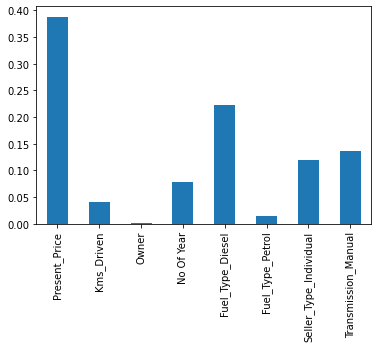

In [ ]:
pd.Series(model.feature_importances_ ,index=X.columns).plot(kind = 'bar'  , rot = 90)

In [ ]:
## Doing traintest split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state = 0 , test_size = 0.2)

**Model Selection**

In [ ]:
from sklearn.linear_model import LinearRegression
LRM = LinearRegression()
LRM.fit(x_train,y_train)
LRM.score(x_test , y_test)

0.9144342972228519

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5 ,test_size =0.2 , random_state = 0)

In [ ]:
cross_val_score(LRM , X,Y,cv = cv)

array([0.9144343 , 0.81157191, 0.82958652, 0.84584462, 0.85555828])

Finding best model through randomizesearcv

In [ ]:
# Hyperparameter tuning
# Import models which we want to hyperparameter tuning

from sklearn.linear_model import LinearRegression
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV

In [ ]:
# Method to find best modelamong above 3

def Perfect_Model(X,Y):
    Model_Algo = {
        'Linear_Regression' : {
            'model' : LinearRegression(),
            'params' : {
                'normalize' : [True, False]
            }
        },

        'DecisionTree' : {
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse' , 'friedman' , 'mae'],
                'splitter' : ['best' , 'random'],
                'max_depth' : [x for x in range( 5 , 30 , 5)],
                'min_samples_leaf' : [1,3,5,10]
            }
        },

        'Random_Forest' : {
            'model' : RandomForestRegressor(),
            'params' : {
                'n_estimators' : [x for x in range(20 , 150 , 20)],
                'max_features' : ['auto' , 'sqrt'],
                'max_depth' : [x for x in range(5 , 35 , 5)],
                'min_samples_split' : [2,5,10,15,100],
                'min_samples_leaf' : [1,2,5,10]
            }
        }
    }

    score = []
    cv = ShuffleSplit(n_splits=5 , random_state= 0 , test_size=0.2)
    for algo_name , config in Model_Algo.items():
        rs = RandomizedSearchCV(config['model'] , config['params'] , cv =cv ,return_train_score = False, n_iter=5)
        rs.fit(x_train,y_train)
        score.append({
            'model' : algo_name,
            'best_score' : rs.best_score_,
            'best_params' : rs.best_params_,
        })

    result = pd.DataFrame(score , columns=[ 'model' , 'best_score' , 'best_params'])
    print(result.best_params.tolist())
    return result


In [ ]:
Perfect_Model(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=5. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated i

[{'normalize': False}, {'splitter': 'random', 'min_samples_leaf': 1, 'max_depth': 15, 'criterion': 'mae'}, {'n_estimators': 120, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 5}]


,model,best_score,best_params
0,Linear_Regression,0.850996,{'normalize': False}
1,DecisionTree,0.907087,"{'splitter': 'random', 'min_samples_leaf': 1, ..."
2,Random_Forest,0.930567,"{'n_estimators': 120, 'min_samples_split': 2, ..."


In [ ]:
final_RF_model = RandomForestRegressor(n_estimators = 140 , min_samples_split = 2 ,max_depth = 15 , criterion= 'mae')
final_RF_model.fit(x_train,y_train)
final_RF_model.score(x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:399: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


0.9582905452288059

<function Perfect_Model at 0x7f6714068f80>


In [ ]:
cross_val_score(RandomForestRegressor(n_estimators=140, min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=15), X,Y,cv=cv)


array([0.95215294, 0.92208664, 0.95703949, 0.83696575, 0.94782035])

Random Rorest Algorithm performs best among all three 

**Accuracy of** **95%**

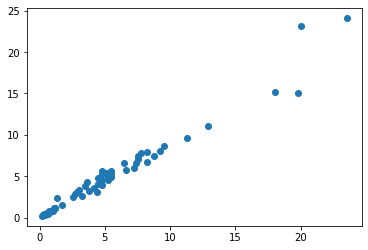

In [ ]:
Predection = final_RF_model.predict(x_test)
plt.scatter(y_test , Predection)

In [ ]:
with open('RF_Price_Predection_model.pkl' , 'wb') as file:
    pickle.dump(final_RF_model,file)